In [35]:
import numpy as np
import igl
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import mpl_toolkits.mplot3d 
from icosphere import icosphere
import plotly.graph_objects as go
import os
import ripleyK as rk
import trimesh

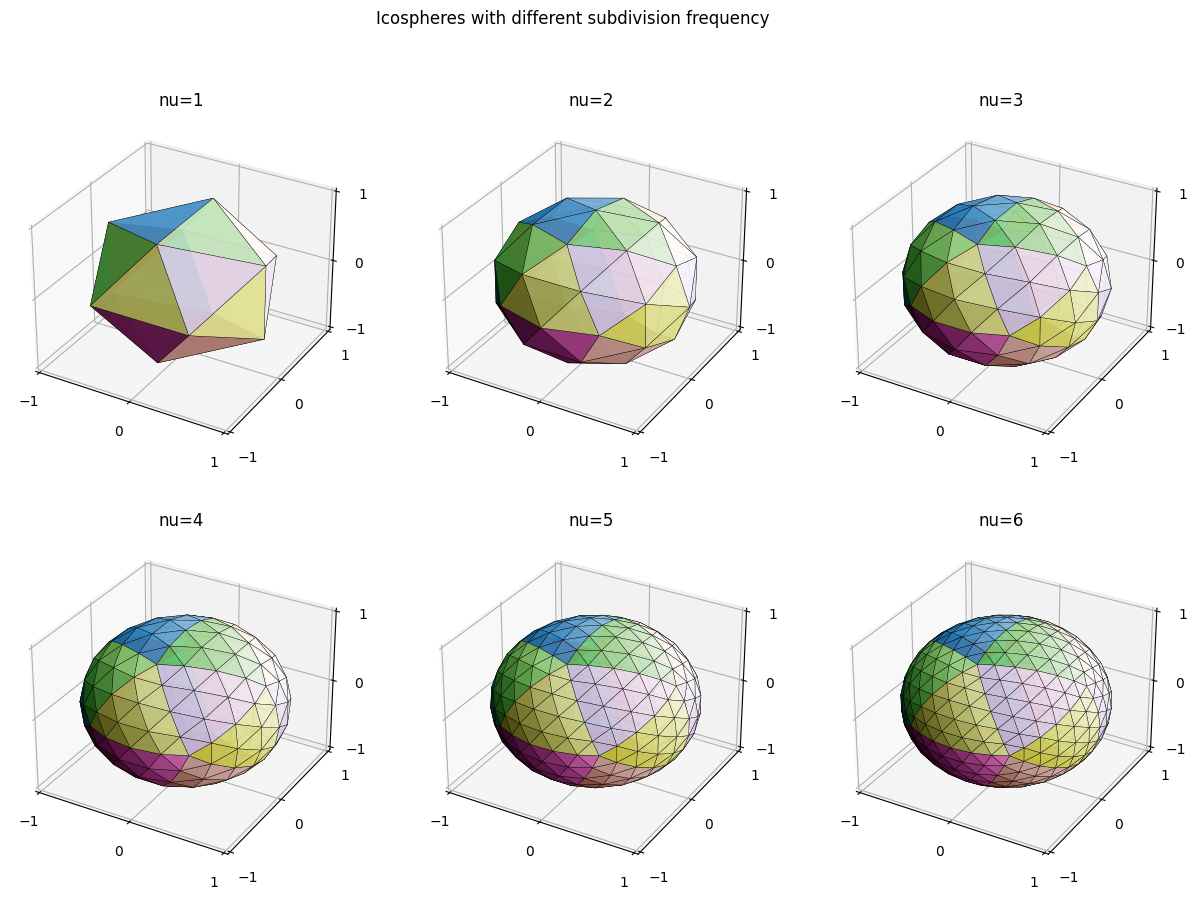

In [36]:
# source: https://github.com/vedranaa/icosphere/blob/main/Example_in_matplotlib.ipynb

fig = plt.figure(figsize=(15, 10))
for nu in range(1,7):

    vertices, faces = icosphere(nu=nu)
    
    # basic mesh color, divided in 20 groups (one for each original face)
    jet = matplotlib.cm.tab20(np.linspace(0,1,20))
    jet = np.tile(jet[:,:3], (1, faces.shape[0]//20))
    jet = jet.reshape(faces.shape[0], 1, 3)

    # computing face shading intensity based on face normals  
    face_normals = np.cross(vertices[faces[:,1]]-vertices[faces[:,0]], 
                            vertices[faces[:,2]]-vertices[faces[:,0]])
    face_normals /= np.sqrt(np.sum(face_normals**2, axis=1, keepdims=True))               
    light_source = matplotlib.colors.LightSource(azdeg=60, altdeg=30)
    intensity = light_source.shade_normals(face_normals)

    # blending face colors and face shading intensity
    rgb = light_source.blend_hsv(rgb=jet, intensity=intensity.reshape(-1,1,1))   

    # adding alpha value, may be left out
    rgba = np.concatenate((rgb, 0.9*np.ones(shape=(rgb.shape[0],1,1))), axis=2) 

    # creating mesh with given face colors
    poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
    poly.set_facecolor(rgba.reshape(-1,4)) 
    poly.set_edgecolor('black')
    poly.set_linewidth(0.25)

    # and now -- visualization!
    ax = fig.add_subplot(2, 3, nu, projection='3d')  

    ax.add_collection3d(poly) 
        
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    ax.set_title(f'nu={nu}')

fig.suptitle('Icospheres with different subdivision frequency')
plt.show()

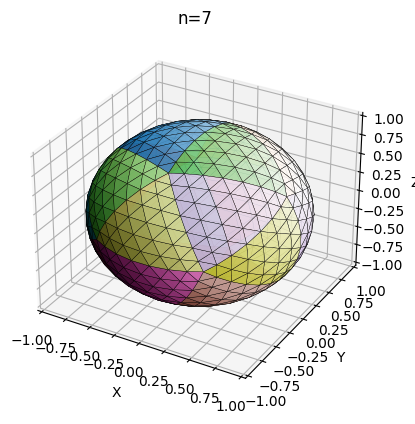

In [37]:
nu = 7
vertices, faces = icosphere(nu)

# basic mesh color, divided in 20 groups (one for each original face)
jet = matplotlib.cm.tab20(np.linspace(0,1,20))
jet = np.tile(jet[:,:3], (1, faces.shape[0]//20))
jet = jet.reshape(faces.shape[0], 1, 3)

# computing face shading intensity based on face normals  
face_normals = np.cross(vertices[faces[:,1]]-vertices[faces[:,0]], 
                        vertices[faces[:,2]]-vertices[faces[:,0]])
face_normals /= np.sqrt(np.sum(face_normals**2, axis=1, keepdims=True))               
light_source = matplotlib.colors.LightSource(azdeg=60, altdeg=30)
intensity = light_source.shade_normals(face_normals)

# blending face colors and face shading intensity
rgb = light_source.blend_hsv(rgb=jet, intensity=intensity.reshape(-1,1,1))   

# adding alpha value, may be left out
rgba = np.concatenate((rgb, 0.9*np.ones(shape=(rgb.shape[0],1,1))), axis=2) 

# creating mesh with given face colors
poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
poly.set_facecolor(rgba.reshape(-1,4)) 
poly.set_edgecolor('black')
poly.set_linewidth(0.25)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  

ax.add_collection3d(poly) 

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'n={nu}')
plt.savefig('icosphere.png')
plt.show()

In [38]:
# Geodetic distance between two points 
print(vertices.shape, faces.shape)

vertices = vertices.astype(float)
faces = faces.astype(int)

vs, vt = np.random.randint(0, len(vertices), 2)
# fs, ft = np.random.randint(0, len(faces), 2)

fs, ft = 750, 890
vs, vt, fs, ft = np.array([vs]), np.array([vt]), np.array([fs]), np.array([ft])

# finding the shortest path between the two points
dist = igl.exact_geodesic(vertices, faces, vs, vt)
# dist = igl.exact_geodesic(vertices, faces, fs, ft)
# print(fs, ft)
# print(dist)

(492, 3) (980, 3)


In [39]:
def samples_uniform_sphere(n):
    # Generating z coordinates with radius = 1
    z = np.random.uniform(-1,1,n)

    # Generating azimuthal angles
    phi = np.random.uniform(0,2*math.pi,n)

    # Generating x and y coordinates
    x = np.sqrt(1-z**2)*np.cos(phi)
    y = np.sqrt(1-z**2)*np.sin(phi)
    samples = np.array([x,y,z]).T
    return samples

def sample_faces(vertices, faces, num_samples):
    # calculate the area of each triangle
    a = vertices[faces[:, 0]]
    b = vertices[faces[:, 1]]
    c = vertices[faces[:, 2]]
    areas = np.linalg.norm(np.cross(b-a, c-a), axis=1) / 2

    # normalize areas to get probability distribution
    probabilities = areas / np.sum(areas)

    # randomly choose triangles to sample from
    face_indices = np.random.choice(len(faces), size=num_samples, p=probabilities)

    # generate random points within each selected triangle
    u = np.random.rand(num_samples, 1)
    v = np.random.rand(num_samples, 1)
    a = vertices[faces[face_indices, 0]]
    b = vertices[faces[face_indices, 1]]
    c = vertices[faces[face_indices, 2]]
    points = (1 - u) * a + (u * (1 - v)) * b + (u * v) * c

    return points

In [40]:
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
mesh.export('icosphere.obj')

'# https://github.com/mikedh/trimesh\nv 0.00000000 0.52573111 0.85065081\nv 0.00000000 -0.52573111 0.85065081\nv 0.52573111 0.85065081 0.00000000\nv -0.52573111 0.85065081 0.00000000\nv 0.85065081 0.00000000 0.52573111\nv -0.85065081 0.00000000 0.52573111\nv -0.00000000 -0.52573111 -0.85065081\nv -0.00000000 0.52573111 -0.85065081\nv -0.52573111 -0.85065081 -0.00000000\nv 0.52573111 -0.85065081 -0.00000000\nv -0.85065081 -0.00000000 -0.52573111\nv 0.85065081 -0.00000000 -0.52573111\nv 0.00000000 0.40385184 0.91482440\nv 0.00000000 0.25604236 0.96666556\nv 0.00000000 0.08794845 0.99612503\nv 0.00000000 -0.08794845 0.99612503\nv 0.00000000 -0.25604236 0.96666556\nv 0.00000000 -0.40385184 0.91482440\nv 0.08077037 0.61531141 0.78413520\nv 0.17069491 0.70292743 0.69047540\nv 0.26384534 0.77870451 0.56921430\nv 0.35179379 0.83305964 0.42691073\nv 0.42673727 0.86117031 0.27619016\nv 0.48462221 0.86490557 0.13068920\nv -0.08077037 0.61531141 0.78413520\nv -0.17069491 0.70292743 0.69047540\nv -

In [41]:
points = sample_faces(vertices, faces, 100)
points_uniform = samples_uniform_sphere(100)

x, y, z = vertices.T
i, j, k = faces.T

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, color='cyan', opacity=0.50)])
fig.add_trace(go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=2, color='red')))
fig.add_trace(go.Scatter3d(x=points_uniform[:,0], y=points_uniform[:,1], z=points_uniform[:,2], mode='markers', marker=dict(size=2, color='blue')))
fig.show()

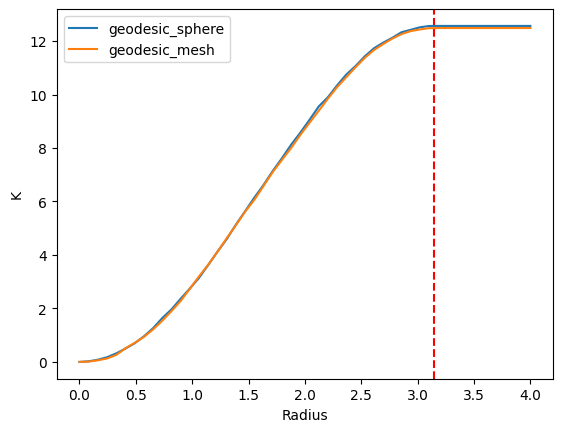

In [42]:
rmax = math.sqrt(rk.mesh_area(vertices, faces))
radii = np.linspace(0, 4, 50)

# area_mesh = mesh_area(vertices, faces)
# area_sphere = surfaceArea(1)
# print('Area of the mesh: ', area_mesh)
# print('Area of the sphere: ', area_sphere)


# dist_mesh = shortest_path(vertices, faces, np.array(points[0]).reshape(1,3), np.array(points[1]).reshape(1,3))
# dist = distance(1, points[0], points[1])

# print('Distance between two points on the mesh: ', dist_mesh)
# print('Distance between two points on the sphere: ', dist)

# pair_distance_mesh = pair_distance(vertices, faces, points)
# pair_distance_sphere = pairDistances(1, points)

# print('Distance between all pairs of points on the mesh: ', pair_distance_mesh)
# print('Distance between all pairs of points on the sphere: ', pair_distance_sphere)


kt = rk.ripleyK(1, points_uniform, radii)
kt_mesh = rk.ripleyK_mesh(vertices, faces, points, radii)

# print('Ripley''s K function for a sphere: ', kt)
# print('Ripley''s K function for a mesh: ', kt_mesh)

# Plotting the Ripley's K function

plt.axvline(x=math.pi, color='r', linestyle='--')
plt.plot(radii, kt, label='geodesic_sphere')
plt.plot(radii, kt_mesh, label='geodesic_mesh')
plt.xlabel('Radius')
plt.ylabel('K')
plt.legend()
plt.show()

In [43]:
current_dir = os.getcwd()

vertices, faces = igl.read_triangle_mesh(os.path.join(current_dir, "mesh", "torus-100-3-.25.obj"))

# sampling points on the mesh
samples_mesh = sample_faces(vertices, faces, 200)

x, y, z = vertices.T
i, j, k = faces.T

lines= go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color= 'black', width=1.0))
# fig1 = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, 
                                # i=i, j=j, k=k, 
                                # colorscale = [[0, 'cyan'],
                                #             [1, 'yellow']],
                                # intensity = z,
                                # opacity=0.50,
                                # showscale=True)])
fig1 = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, color='cyan', opacity=0.50)])
fig1.add_trace(go.Scatter3d(x=samples_mesh[:,0], y=samples_mesh[:,1], z=samples_mesh[:,2], mode='markers', marker=dict(size=3, color='red')))
fig1.add_trace(lines)
fig1.show()

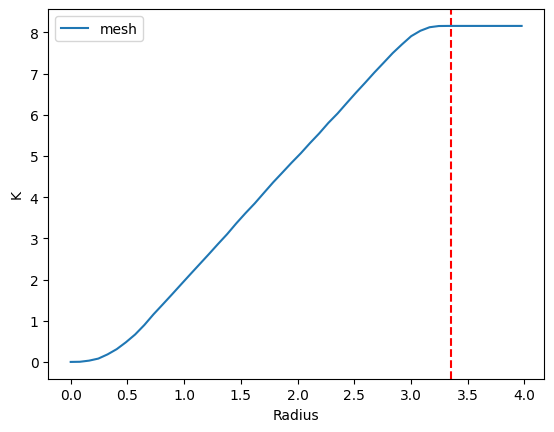

In [44]:
radii = np.linspace(0, rmax+rmax/8, 50)

kt_mesh = rk.ripleyK_mesh(vertices, faces, samples_mesh, radii)

# Plotting the Ripley's K function
plt.axvline(x=3.35, color='r', linestyle='--')
plt.plot(radii, kt_mesh, label='mesh')
plt.xlabel('Radius')
plt.ylabel('K')
plt.legend()
plt.show()